In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#First we approximate the values of T_P and T_D

In [3]:
A = pd.read_csv("Data.csv")

In [4]:
B = A.to_numpy()

In [5]:
def DataSetPrep(Dataset):
    #change the (N, K, E[T]) fields in dataset to (N, 32K(K-1)(N-1)^3/N^6, E[T])
    Dat = []
    for x in range(len(Dataset)):
        n = Dataset[x][0]
        k = Dataset[x][1]
        t = Dataset[x][2]
        Dat.append([n**3, 32*k*(k-1)*(((n-1)/(n*n))**3), t])
    return Dat

In [17]:
def SampleDatasetToLinearRegForm(Dataset):
    X = []
    Y = []
    for d in Dataset:
        X.append([d[0], d[1], 1])
        Y.append(d[2])
    return (np.array(X), np.array(Y))

In [18]:
C = DataSetPrep(B)

In [19]:
D = SampleDatasetToLinearRegForm(C)

In [20]:
def linearRegression(X, Y):
    Vars = np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), np.matmul(X.transpose(), Y))
    return Vars

In [21]:
T_p, T_d, C = linearRegression(D[0], D[1])

In [22]:
print(T_p, T_d, C)
print(T_d/T_p)

0.0001389100022844617 2.873268245571894e-05 0.028829640310304994
0.20684387001074106


In [23]:
ratio = T_d/T_p
Value = np.power(32 * B[:,1] * (B[:,1]-1) * ratio, (1/6))

In [24]:
for i in range(len(Value)):
    print(Value[i], B[:,0][i], B[:, 1][i])

8.38930515630459 3.0 230.0
9.743124760913764 12.0 360.0
9.064588197264804 4.0 290.0
5.349329082536863 9.0 60.0
9.268699476627756 5.0 310.0
4.66644557760191 10.0 40.0
9.743124760913764 10.0 360.0
8.265641622896267 10.0 220.0
5.349329082536863 4.0 60.0
8.13816271624636 14.0 210.0
8.265641622896267 19.0 220.0
6.1292056256558105 17.0 90.0
9.743124760913764 16.0 360.0
9.064588197264804 14.0 290.0
8.265641622896267 19.0 220.0
7.431074637015167 6.0 160.0
8.00655978466098 12.0 200.0
5.031063353954207 10.0 50.0
5.891849144022705 12.0 80.0
5.031063353954207 13.0 50.0
7.106502472938094 15.0 140.0
8.265641622896267 15.0 220.0
7.870482175541814 12.0 190.0
9.832639588195784 17.0 370.0
4.66644557760191 6.0 40.0
8.265641622896267 15.0 220.0
8.50942658871059 16.0 240.0
5.031063353954207 7.0 50.0
7.106502472938094 11.0 140.0
10.006936414771394 10.0 390.0
7.106502472938094 10.0 140.0
7.583238406944867 16.0 170.0
5.891849144022705 12.0 80.0
7.106502472938094 11.0 140.0
4.66644557760191 6.0 40.0
9.83263958

In [25]:
#Now we bring in the checker data to check if the algorithm is correct or not

In [37]:
DataChecker = pd.read_csv("MinData.csv").to_numpy()

In [54]:
def CorrectFunction(Y):
    ratio = 0.2
    return (np.power(32 * Y * (Y-1) * ratio, (1/6))).astype(np.int32)

In [55]:
X = DataChecker[:,0]
Y = CorrectFunction(X)

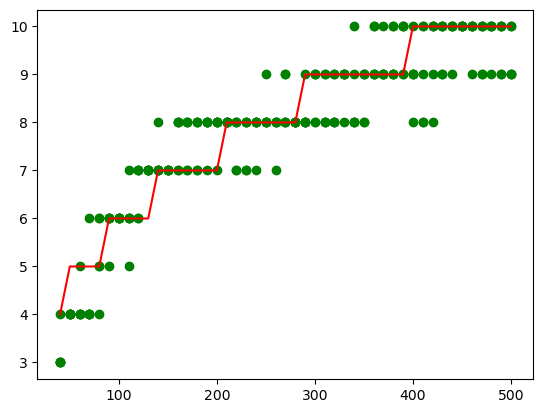

In [57]:
plt.scatter(DataChecker[:,0], DataChecker[:,1], color = 'green')
plt.plot(X, Y, color='red')

In [30]:
#we see that the prediciton fits pretty well top the data. The only places its having problems is on low values of K
#This is because low K value requires low N values as we made this approximation N-1 ≈ N, which creates in accuracies on lower N values